# Initial Setup

## Import

In [ ]:
import os
import glob

os.environ["HUGGINGFACEHUB_API_TOKEN"] = ""

In [22]:
import time
import concurrent.futures

from smolagents import FinalAnswerStep, ActionStep, PlanningStep, AgentMaxStepsError, TokenUsage, RunResult, Timing

## Setting Model Configuration

### API Config

In [23]:
USE_INFERENCE_API = True
USE_SMOLAGENT_VLLM = False
INFERENCE_PROVIDER = 'VLLM'
# INFERENCE_PROVIDER = 'OpenAIServer'
USE_NGROK = False

### Run Config

In [24]:
# TIMEOUT_PER_QUESTION = 60 * 10  # 60 * minutes
TIMEOUT_PER_QUESTION = 300

### LLM Config

In [25]:
MAX_NEW_TOKENS = 2048
PLANNING_INTERVAL = None # Do not set to zero, if set to zero, it will cause divided by zero exception
MAXIMUM_STEPS = 10
MAXIMUM_PRINT_OUTPUT_LENGTH = 2000

TEMPERATURE = 0.7
TOP_P = 1.0
USE_LOGPROBS = True
TOP_LOGPROBS = 5

# select_model_id = "codellama/CodeLlama-34b-Instruct-hf"
# select_model_id = "Deepseek-ai/deepseek-coder-1.3b-instruct"
# select_model_id = "mistralai/Mistral-7B-Instruct-v0.2"
# select_model_id = "meta-llama/Llama-3.1-70B-Instruct"
# select_model_id = "meta-llama/Llama-3.3-70B-Instruct"
# select_model_id = "Qwen/Qwen2.5-Coder-32B-Instruct"
# select_model_id = "facebook/cwm"
select_model_id = "Qwen/Qwen3-Coder-30B-A3B-Instruct"
# select_model_id = "nvidia/NVIDIA-Nemotron-Nano-12B-v2"
# select_model_id = "moonshotai/Kimi-Linear-48B-A3B-Instruct"
# select_model_id = "zai-org/GLM-4.5-Air"
# select_model_id = "MiniMaxAI/MiniMax-M2"
# select_model_id = "mistralai/Devstral-2-123B-Instruct-2512"
# select_model_id = "mistralai/Devstral-Small-2505"
# select_model_id = "deepseek-ai/DeepSeek-Coder-V2-Lite-Instruct"
# select_model_id = "nvidia/Llama-3_3-Nemotron-Super-49B-v1_5"
# select_model_id = "Qwen/Qwen2.5-Coder-7B-Instruct"
# select_model_id = "deepseek-ai/DeepSeek-V3"
# select_model_id = "deepseek-ai/DeepSeek-R1"
# select_model_id = "Qwen/Qwen2.5-Coder-7B-Instruct"
# select_model_id = "Qwen/Qwen2.5-72B-Instruct"

In [26]:
config = {
    "MAX_NEW_TOKENS": MAX_NEW_TOKENS,
    "PLANNING_INTERVAL": PLANNING_INTERVAL,
    "MAXIMUM_STEPS": MAXIMUM_STEPS,
    "MAXIMUM_PRINT_OUTPUT_LENGTH": MAXIMUM_PRINT_OUTPUT_LENGTH,
    "TEMPERATURE": TEMPERATURE,
    "TOP_P": TOP_P,
    "USE_LOGPROBS": USE_LOGPROBS,
    "TOP_LOGPROBS": TOP_LOGPROBS,
    "select_model_id": select_model_id,
    "TIMEOUT_PER_QUESTION": TIMEOUT_PER_QUESTION
}

### LLM API URL

In [27]:
# LLM_API_LINK = "http://localhost:8080/v1"
# LLM_API_LINK = "http://localhost:30005/v1"
LLM_API_LINK = "http://localhost:30001/v1"
# LLM_API_LINK = "http://localhost:30006/v1"
# LLM_API_LINK = "http://localhost:30007/v1"
# LLM_API_LINK = "http://localhost:30008/v1"
# LLM_API_LINK = "http://localhost:30009/v1"
# LLM_API_LINK = "http://localhost:30010/v1"
# LLM_API_LINK = "http://localhost:30004/v1"
# LLM_API_LINK = "https://1521c2afa5be.ngrok-free.app/v1"
# LLM_API_LINK = "https://api.together.xyz/v1/"

### Experiment Directory Name

In [28]:
dir_name = (
    f"MAX-NEW-TOKENS_{MAX_NEW_TOKENS}---"
    f"PLANNING-INTERVAL_{PLANNING_INTERVAL}---"
    f"MAXIMUM-STEPS_{MAXIMUM_STEPS}---"
    f"MAXIMUM-PRINT-OUTPUT-LENGTH_{MAXIMUM_PRINT_OUTPUT_LENGTH}---"
    f"TEMPERATURE_{TEMPERATURE}---"
    f"TOP-P_{TOP_P}---"
    f"USE-LOGPROBS_{USE_LOGPROBS}---"
    f"TOP-LOGPROBS_{TOP_LOGPROBS}"
)

In [29]:
SAVE_DIRNAME = f"{select_model_id}/{dir_name}"

In [30]:
SAVE_ROOT = "/home/hqvo2/Projects/MICCAI_2026/PathVG/experiments"
SAVE_PATH = os.path.join(SAVE_ROOT, "notebook_runs")

### Set Dataset-related params

In [31]:
DATASET_NAME = "PathVG"
AGENT_EXP_NAME = "Test"

In [32]:
AGENT_EXP_SAVE_PATH = os.path.join(SAVE_PATH, AGENT_EXP_NAME, DATASET_NAME, SAVE_DIRNAME)

In [33]:
AGENT_EXP_SAVE_PATH

'/home/hqvo2/Projects/MICCAI_2026/PathVG/experiments/notebook_runs/Test/PathVG/Qwen/Qwen3-Coder-30B-A3B-Instruct/MAX-NEW-TOKENS_2048---PLANNING-INTERVAL_None---MAXIMUM-STEPS_10---MAXIMUM-PRINT-OUTPUT-LENGTH_2000---TEMPERATURE_0.7---TOP-P_1.0---USE-LOGPROBS_True---TOP-LOGPROBS_5'

In [34]:
os.makedirs(SAVE_ROOT, exist_ok=True)
os.makedirs(SAVE_PATH, exist_ok=True)
os.makedirs(AGENT_EXP_SAVE_PATH, exist_ok=True)

In [35]:
import yaml

with open(os.path.join(AGENT_EXP_SAVE_PATH, "config.yaml"), "w") as f:
    yaml.dump(config, f, sort_keys=False)

print("✅ Config dictionary created and saved:")
print(config)


✅ Config dictionary created and saved:
{'MAX_NEW_TOKENS': 2048, 'PLANNING_INTERVAL': None, 'MAXIMUM_STEPS': 10, 'MAXIMUM_PRINT_OUTPUT_LENGTH': 2000, 'TEMPERATURE': 0.7, 'TOP_P': 1.0, 'USE_LOGPROBS': True, 'TOP_LOGPROBS': 5, 'select_model_id': 'Qwen/Qwen3-Coder-30B-A3B-Instruct', 'TIMEOUT_PER_QUESTION': 300}


## Logging Opentelemetry with Phoenix

In [36]:
# from opentelemetry import trace
# from opentelemetry.sdk.trace import TracerProvider
# from opentelemetry.sdk.trace.export import BatchSpanProcessor
# from opentelemetry.sdk.resources import Resource, SERVICE_NAME, DEPLOYMENT_ENVIRONMENT

# from openinference.instrumentation.smolagents import SmolagentsInstrumentor
# from opentelemetry.exporter.otlp.proto.http.trace_exporter import OTLPSpanExporter
# from opentelemetry.sdk.trace.export import ConsoleSpanExporter, SimpleSpanProcessor

# endpoint = "http://0.0.0.0:6006/v1/traces"
# trace_provider = TracerProvider()
# trace_provider.add_span_processor(SimpleSpanProcessor(OTLPSpanExporter(endpoint)))

# SmolagentsInstrumentor().instrument(tracer_provider=trace_provider)

## Logging Opentelemetry with Langfuse

In [ ]:
# import os
# import base64

# LANGFUSE_PUBLIC_KEY="pk-lf-73d5def1-8107-42e8-96fa-8633fae12dea"
# LANGFUSE_SECRET_KEY="sk-lf-46ec2a11-1ded-4f94-b7f7-8ce33649282a"
# LANGFUSE_AUTH=base64.b64encode(f"{LANGFUSE_PUBLIC_KEY}:{LANGFUSE_SECRET_KEY}".encode()).decode()

# os.environ["OTEL_EXPORTER_OTLP_ENDPOINT"] = "https://cloud.langfuse.com/api/public/otel" # EU data region
# # os.environ["OTEL_EXPORTER_OTLP_ENDPOINT"] = "https://us.cloud.langfuse.com/api/public/otel" # US data region
# os.environ["OTEL_EXPORTER_OTLP_HEADERS"] = f"Authorization=Basic {LANGFUSE_AUTH}"

# # your Hugging Face token
# os.environ["HF_TOKEN"] = ""

# from opentelemetry.sdk.trace import TracerProvider

# from openinference.instrumentation.smolagents import SmolagentsInstrumentor
# from opentelemetry.exporter.otlp.proto.http.trace_exporter import OTLPSpanExporter
# from opentelemetry.sdk.trace.export import SimpleSpanProcessor

# trace_provider = TracerProvider()
# trace_provider.add_span_processor(SimpleSpanProcessor(OTLPSpanExporter()))

# SmolagentsInstrumentor().instrument(tracer_provider=trace_provider)

## Load Model

In [ ]:
import os
import torch
import logging

from smolagents import CodeAgent
from huggingface_hub import login
from smolagents import TransformersModel
from smolagents import OpenAIServerModel
from smolagents import VLLMModel


login(os.getenv("HUGGINGFACEHUB_API_TOKEN"))



if USE_INFERENCE_API:  
    if INFERENCE_PROVIDER == 'OpenAIServer':
        os.environ["TOGETHER_API_KEY"] = ""
        model = OpenAIServerModel(
            model_id=select_model_id,
            api_base=LLM_API_LINK, # Leave this blank to query OpenAI servers.
            api_key=os.environ["TOGETHER_API_KEY"], # Switch to the API key for the server you're targeting.
            max_tokens=MAX_NEW_TOKENS,
            temperature=TEMPERATURE,
            top_p=TOP_P,
            logprobs=USE_LOGPROBS,
            top_logprobs=TOP_LOGPROBS      
        )
    elif INFERENCE_PROVIDER == 'VLLM':
        model = OpenAIServerModel(
            model_id=select_model_id,            
            api_base=LLM_API_LINK,
            api_key="EMPTY",
            max_tokens=MAX_NEW_TOKENS,
            temperature=TEMPERATURE,
            top_p=TOP_P,
            logprobs=USE_LOGPROBS,
            top_logprobs=TOP_LOGPROBS            
        )



agent = CodeAgent(    
    # tools=[read_image, load_cell_segmentation_and_classification_result_tool],
    tools=[],
    model=model,    
    additional_authorized_imports=["numpy", "pandas", "matplotlib", "seaborn", "cv2",
                                   "json", "glob", "csv", "networkx", "scipy", "hashlib", "pathlib", "shapely",
                                   "skimage", "imageio", "PIL", "pickle", "scipy.stats",
                                   "sklearn", "scipy.spatial", "scipy.spatial.distance", "shapely.geometry", "micropip", "numpy.linalg",
                                   "scipy.sparse.csgraph", "numpy.random"
                                   ],    
    planning_interval=PLANNING_INTERVAL,  
    max_steps=MAXIMUM_STEPS,
    max_print_outputs_length=MAXIMUM_PRINT_OUTPUT_LENGTH,
    use_structured_outputs_internally=False,    
    executor_type="local",
    # executor_kwargs={
    #     "timeout": TIMEOUT_PER_QUESTION
    # }
    # verbosity_level=logging.CRITICAL
)

































































## Computer Vision Expert Role Prompt

In [39]:
# CV_EXP_ROLE_PROMPT='Your task is to assist with coding-related questions'  # For Conventional LLMs
CV_EXP_ROLE_PROMPT='Your task is to assist with coding-related questions step by step.'
# CV_EXP_ROLE_PROMPT = """
#     If the user question is framed as a yes/no inquiry, please begin the response with either "Yes" or "No".

#     You are given three additional arguments:

#     - microscopy_image : np.array
#         The image content as a numpy array.
        
#     - cells (List[Dict[str, Any]]):
#         A list of dictionaries, each describing a single detected cell in the image.
#         Each dictionary includes:
#             - "polygon_coords" (List[List[float]]): A sequence of [x, y] points
#             outlining the cell boundary (units: microns).
#             - "cell_type" (str): The cell’s label, e.g., "Cancer_Cell", "Immune_Cell",
#             "Other_Cell".

#     - unique_cell_types (List[str]):
#             A list of distinct cell type names present in `cells`.
# """

## Load Image, Associated Expression, GT Bounding Box, CellViT results from PathVG dataset

In [40]:
import torch

In [41]:
org_img_path = "/project/hnguyen2/hqvo2/Projects/MICCAI_2026/datasets/RefPath/refpath_images"
cellvit_path = "/home/hqvo2/Projects/MICCAI_2026/CellViT-plus-plus/PathVG_results/CellViT-SAM-H-x40-AMP-001-1024x1024"

refpath_train_path = "/home/hqvo2/Projects/MICCAI_2026/PathVG/split/data/pathology2/refpath_train.pth"
refpath_testA_path = "/home/hqvo2/Projects/MICCAI_2026/PathVG/split/data/pathology2/refpath_testA.pth"
refpath_testB_path = "/home/hqvo2/Projects/MICCAI_2026/PathVG/split/data/pathology2/refpath_testB.pth"

In [42]:
refpath_train = torch.load(refpath_train_path)
refpath_testA = torch.load(refpath_testA_path)
refpath_testB = torch.load(refpath_testB_path)

/scratch/299444/ipykernel_679691/1684148789.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  refpath_train = torch.load(refpath_train_path)
/scratch/299444/ipykernel_6796

In [43]:
refpath_testA

[('/project/hnguyen2/hqvo2/Projects/MICCAI_2026/datasets/RefPath/refpath_images/10058.jpg',
  'UNKNOWN.pth',
  [704, 482, 315, 293],
  ' Lower right, tightly-packed tumor cells in alveolar space.',
  [],
  ['', '', '']),
 ('/project/hnguyen2/hqvo2/Projects/MICCAI_2026/datasets/RefPath/refpath_images/6534.jpg',
  'UNKNOWN.pth',
  [822, 675, 202, 259],
  'Dense round cell cluster near blood vessel indicates malignancy.',
  [],
  ['', '', '']),
 ('/project/hnguyen2/hqvo2/Projects/MICCAI_2026/datasets/RefPath/refpath_images/3835.jpg',
  'UNKNOWN.pth',
  [296, 330, 433, 364],
  'Loosely arranged tumor cells with stained nuclei in alveolar space.',
  [],
  ['', '', '']),
 ('/project/hnguyen2/hqvo2/Projects/MICCAI_2026/datasets/RefPath/refpath_images/16177.jpg',
  'UNKNOWN.pth',
  [300, 314, 424, 397],
  'Tumor cell cluster with irregular nuclei in alveolar space.',
  [],
  ['', '', '']),
 ('/project/hnguyen2/hqvo2/Projects/MICCAI_2026/datasets/RefPath/refpath_images/16849.jpg',
  'UNKNOWN.pt

In [44]:
from typing import List, Tuple, Any, Optional
from pathlib import Path


def get_sample_by_filename(
    samples: List[Tuple[Any, Any, Any, Any, Any, Any]],
    filename: str,
    match_mode: str = "exact"
) -> Optional[Tuple[Any, List[float], str]]:
    """
    Search for a sample by image filename and return (image_path, bbox, expression).
    
    Args:
        samples: List of tuples (img_path, _, bbox_xywh, expression, ...)
        filename: Name of the image file to search for (e.g., "image_001.jpg")
        match_mode: How to match the filename:
            - "exact": Exact filename match (case-sensitive)
            - "stem": Match without extension (e.g., "image_001" matches "image_001.jpg")
            - "contains": Partial match (filename contains the search string)
    
    Returns:
        Tuple of (img_path, bbox_xywh, expression) if found, None otherwise.
        bbox_xywh is returned as [x, y, w, h] list of floats.
    
    Example:
        >>> sample = get_sample_by_filename(samples, "cat_001.jpg")
        >>> if sample:
        >>>     img_path, bbox, expr = sample
        >>>     print(f"Found: {expr} at {bbox}")
    """
    if not samples:
        raise ValueError("samples is empty")
    
    search_path = Path(filename)
    
    for item in samples:
        img_path, _, bbox_xywh, expression, *_ = item
        candidate_path = Path(img_path)
        
        # Determine match based on mode
        if match_mode == "exact":
            is_match = candidate_path.name == search_path.name
        elif match_mode == "stem":
            is_match = candidate_path.stem == search_path.stem
        elif match_mode == "contains":
            is_match = filename.lower() in candidate_path.name.lower()
        else:
            raise ValueError(f"Invalid match_mode: {match_mode}. Use 'exact', 'stem', or 'contains'")
        
        if is_match:
            # Convert bbox to list of floats
            bbox_list = list(map(float, bbox_xywh))
            return (img_path, bbox_list, expression)
    
    # Not found
    return None

In [63]:
def generate_segmentation_and_classification_masks(
    image_shape,
    bbox_contour_dict,
    boundary_thickness=2,
    add_boundaries=True
):
    """
    Generate both segmentation mask and classification mask from bbox/contour dictionary.
    
    Args:
        image_shape: tuple (height, width), shape of the output masks
        bbox_contour_dict: list or dict with 'type' and 'contour' keys for each cell
        boundary_thickness: int, thickness of black boundary in pixels (default: 2)
        add_boundaries: bool, whether to add black boundaries to classification mask (default: True)
    
    Returns:
        tuple: (segmentation_mask, classification_mask_rgb, classification_mask_int, cells_list)
            - segmentation_mask: binary mask (H, W) with 0/1 values (0=background, 1=cell)
            - classification_mask_rgb: RGB image (H, W, 3) with colored cells by type
            - classification_mask_int: integer mask (H, W) with class IDs (0-5)
            - cells_list: list of dictionaries [{'polygon_coords': contour_array, 'cell_type': cell_type_name}, ...]
                where contour_array is numpy array and cell_type_name is string
    """
    # Initialize masks
    segmentation_mask = np.zeros(image_shape, dtype=np.uint8)
    classification_mask_int = np.zeros(image_shape, dtype=np.int32)
    cells_list = []  # List to store cell dictionaries
    
    # Handle both list and dict inputs
    if isinstance(bbox_contour_dict, list):
        items = bbox_contour_dict
    elif isinstance(bbox_contour_dict, dict):
        items = bbox_contour_dict.values()
    else:
        # Return empty masks if input is invalid
        classification_mask_rgb = np.full((*image_shape, 3), BACKGROUND_COLOR, dtype=np.uint8)
        return segmentation_mask, classification_mask_rgb, classification_mask_int, cells_list
    
    # Fill masks with cell information
    for item in items:
        class_id = int(item.get('type', 0))  # Get 'type' as class ID
        contour = item.get('contour')
        
        if contour is not None:
            contour = np.array(contour, dtype=np.int32)
            
            # Get cell type name from class ID
            cell_type_name = PANNUKE_CLASSES.get(class_id, 'Unknown')
            
            # Add to cells list as dictionary
            cells_list.append({
                'polygon_coords': contour.copy(),
                'cell_type': cell_type_name
            })
            
            # Fill segmentation mask (binary: 0 or 1)
            cv2.drawContours(segmentation_mask, [contour], 0, 1, thickness=-1)
            
            # Fill classification mask with class ID
            cv2.drawContours(classification_mask_int, [contour], 0, class_id, thickness=-1)
    
    # Generate colored classification mask
    cmap = plt.colormaps.get_cmap('twilight_shifted')
    
    # Initialize RGB mask with light pink background
    classification_mask_rgb = np.full((*image_shape, 3), BACKGROUND_COLOR, dtype=np.uint8)
    
    # Map each class ID to its color
    for class_id in range(PANNUKE_NUM_CLASSES):
        if class_id == 0:
            # Background is light pink
            color_rgb_255 = BACKGROUND_COLOR
        else:
            # Evenly distribute other classes across colormap
            color_value = class_id / (PANNUKE_NUM_CLASSES - 1)
            color_rgb = cmap(color_value)[:3]  # Get RGB, ignore alpha
            color_rgb_255 = (np.array(color_rgb) * 255).astype(np.uint8)
        
        # Apply color to all pixels of this class
        mask_class = (classification_mask_int == class_id)
        classification_mask_rgb[mask_class] = color_rgb_255
    
    # Add black boundaries around each cell if requested
    if add_boundaries:
        for item in items:
            contour = item.get('contour')
            if contour is not None:
                contour = np.array(contour, dtype=np.int32)
                # Draw black boundary on RGB mask
                cv2.drawContours(classification_mask_rgb, [contour], 0, (0, 0, 0), 
                               thickness=boundary_thickness)
    
    return segmentation_mask, classification_mask_rgb, classification_mask_int, cells_list

In [64]:
cellvit_path

data = torch.load(os.path.join(cellvit_path,  "3835_pred.pt"))
predictions = data['predictions']
post_processed = data['post_processed']


/scratch/299444/ipykernel_679691/608812401.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = torch.load(os.path.join(cellvit_path,  "3835_pred.pt"))


In [65]:
# Generate all three masks at once
segm_mask, colored_cls_mask, int_cls_mask, cells_list = generate_segmentation_and_classification_masks(
    image_shape=(1024, 1024),
    bbox_contour_dict=post_processed[1][0],
    boundary_thickness=2,
    add_boundaries=True
)

# Now you can use:
# - segm_mask: binary segmentation (0=background, 1=any cell)
# - colored_cls_mask: RGB visualization with colors by cell type
# - int_cls_mask: integer mask with class IDs for further processing
# - cells_list: list of (contour, cell_type_name) for each detected cell

In [66]:
cells_list

[{'polygon_coords': array([[363,   0],
         [361,   2],
         [361,   3],
         [359,   5],
         [359,   6],
         [358,   7],
         [358,   9],
         [357,  10],
         [357,  12],
         [354,  15],
         [354,  16],
         [353,  17],
         [354,  18],
         [354,  22],
         [355,  23],
         [355,  24],
         [356,  25],
         [357,  24],
         [360,  24],
         [361,  25],
         [366,  25],
         [367,  24],
         [368,  24],
         [369,  23],
         [370,  23],
         [372,  21],
         [373,  21],
         [378,  16],
         [378,  15],
         [380,  13],
         [380,  12],
         [381,  11],
         [381,  10],
         [382,   9],
         [382,   8],
         [383,   7],
         [383,   3],
         [382,   2],
         [382,   0]], dtype=int32),
  'cell_type': 'Neoplastic'},
 {'polygon_coords': array([[711,   0],
         [709,   2],
         [709,   5],
         [708,   6],
         [708,  

In [54]:
post_processed[1][0]

{np.int32(1): {'bbox': array([[  0, 353],
         [ 26, 384]]),
  'centroid': array([367.94270833,  11.71354167]),
  'contour': array([[363,   0],
         [361,   2],
         [361,   3],
         [359,   5],
         [359,   6],
         [358,   7],
         [358,   9],
         [357,  10],
         [357,  12],
         [354,  15],
         [354,  16],
         [353,  17],
         [354,  18],
         [354,  22],
         [355,  23],
         [355,  24],
         [356,  25],
         [357,  24],
         [360,  24],
         [361,  25],
         [366,  25],
         [367,  24],
         [368,  24],
         [369,  23],
         [370,  23],
         [372,  21],
         [373,  21],
         [378,  16],
         [378,  15],
         [380,  13],
         [380,  12],
         [381,  11],
         [381,  10],
         [382,   9],
         [382,   8],
         [383,   7],
         [383,   3],
         [382,   2],
         [382,   0]], dtype=int32),
  'type_prob': 0.9982638871557918,
  't

In [53]:
np.unique(int_cls_mask)

array([0, 1, 2, 3], dtype=int32)

In [30]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from PIL import Image


def plot_sample(img_path: str, bbox_xywh: List[float], expression: str):
    """Plot a single sample with bounding box, preserving aspect ratio."""
    img = Image.open(img_path).convert("RGB")
    x, y, w, h = bbox_xywh
    
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    ax.imshow(img)
    ax.axis("off")
    ax.add_patch(patches.Rectangle((x, y), w, h, linewidth=2, edgecolor="lime", facecolor="none"))
    ax.set_title(expression)
    ax.set_aspect('equal')
    plt.tight_layout()
    plt.show()

Found: Loosely arranged tumor cells with stained nuclei in alveolar space. at [296.0, 330.0, 433.0, 364.0]


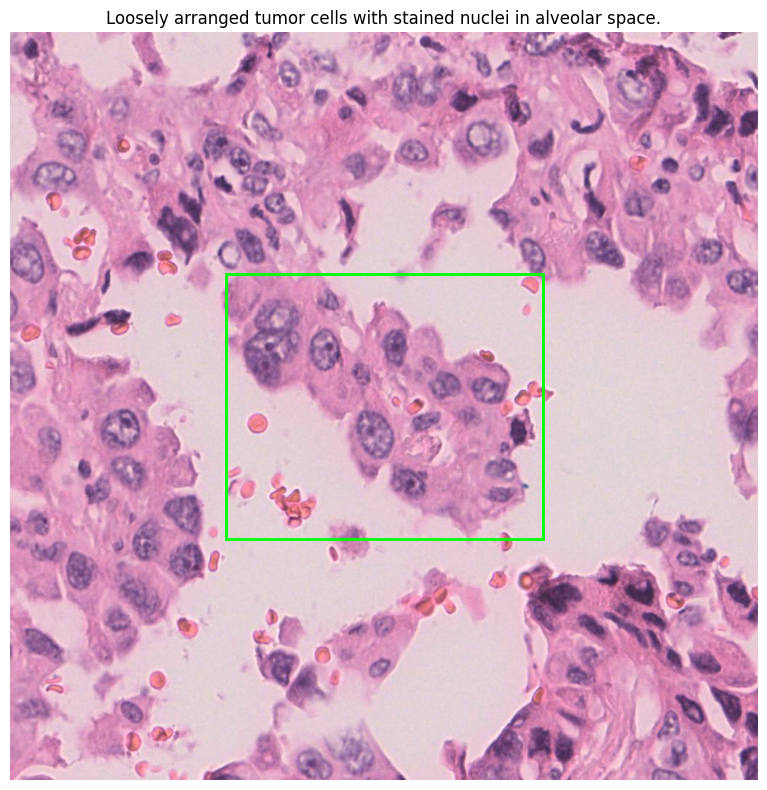

In [32]:
sample = get_sample_by_filename(refpath_testA, "3835.jpg")
if sample:
    img_path, bbox, expr = sample
    print(f"Found: {expr} at {bbox}")
    plot_sample(img_path, bbox, expr)

# Run Agent on Single Dataset

## Run Agent

### Define Run Function

In [ ]:
import os
import pickle as pkl
from typing import Optional, Any


def save_agent_results(
    agent: Any,
    analysis: Optional[Any],
    question: str,
    fov_question_gt: Any,
    question_id: str,
    fov_id: str,
    save_path: str,
    convert_to_number: callable
) -> None:
    """
    Save agent results including agent state, analysis, ground truth, replay, 
    visualization, and messages.
    
    Args:
        agent: The agent object to save
        analysis: Analysis result object (can be None)
        question: The question string
        fov_question_gt: Ground truth answer for the field of view question
        question_id: Identifier for the question
        fov_id: Identifier for the field of view
        save_path: Base directory path for saving results
        convert_to_number: Function to convert ground truth to number format
    """
    
    # Save agent
    agent_dir = os.path.join(save_path, 'agent')
    os.makedirs(agent_dir, exist_ok=True)
    agent_output_dirname = os.path.join(
        agent_dir,
        f"smolagent---question-id_{question_id}---fov-id_{fov_id}"
    )
    agent.save(agent_output_dirname)
    
    # Save analysis result
    analysis_dir = os.path.join(save_path, 'analysis_result')
    os.makedirs(analysis_dir, exist_ok=True)
    analysis_output_filename = os.path.join(
        analysis_dir,
        f"smolagent-analysis---question-id_{question_id}---fov-id_{fov_id}.pkl"
    )
    with open(analysis_output_filename, "wb") as f:
        pkl.dump(analysis.dict() if analysis else None, f)
    
    # Save ground truth answer tracking
    gt_dir = os.path.join(save_path, 'gt_answer_track')
    os.makedirs(gt_dir, exist_ok=True)
    gt_output_filename = os.path.join(
        gt_dir,
        f"gt_agent-answer-track---question-id_{question_id}---fov-id_{fov_id}.pkl"
    )
    with open(gt_output_filename, "wb") as f:
        analysis_output = analysis.output if analysis and hasattr(analysis, 'output') else None
        pkl.dump(
            (question, convert_to_number(fov_question_gt), analysis_output),
            f
        )
    
    # Save agent replay
    replay_dir = os.path.join(save_path, 'agent_replay')
    os.makedirs(replay_dir, exist_ok=True)
    replay_output_filename = os.path.join(
        replay_dir,
        f"agent_replay---question-id_{question_id}---fov-id_{fov_id}.pkl"
    )
    with open(replay_output_filename, "wb") as f:
        pkl.dump(agent.replay(), f)
    
    # Save agent visualization
    viz_dir = os.path.join(save_path, 'agent_visualization')
    os.makedirs(viz_dir, exist_ok=True)
    viz_output_filename = os.path.join(
        viz_dir,
        f"agent_visualization---question-id_{question_id}---fov-id_{fov_id}.pkl"
    )
    with open(viz_output_filename, "wb") as f:
        pkl.dump(agent.visualize(), f)
    
    # Save agent messages
    messages_dir = os.path.join(save_path, 'agent_messages')
    os.makedirs(messages_dir, exist_ok=True)
    messages_output_filename = os.path.join(
        messages_dir,
        f"agent_messages---question-id_{question_id}---fov-id_{fov_id}.pkl"
    )
    with open(messages_output_filename, "wb") as f:
        pkl.dump(agent.write_memory_to_messages(), f)

In [ ]:
from collections import defaultdict

def process_fov_questions(
    all_fovs_dirs,
    question_answer_ground_truth,
    questions_datasets_pd_dict,
    dataset_key,
    agent,
    save_path,
    gt_answer_track_dict,
    ground_truth_assisted_model_name,
    cv_exp_role_prompt,
    debug_questions_list=None,
    max_fovs=None,
    max_questions_per_fov=None,
    specific_fov_index=None,
    specific_question_index=None,  # NEW PARAMETER (index-based)
    per_question_timeout=None
):
    """
    Process questions for each field of view (FOV) and track ground truth answers.
    
    Parameters:
    -----------
    all_fovs_dirs : list
        List of directories containing FOV data
    question_answer_ground_truth : str
        Path to ground truth directory
    questions_datasets_pd_dict : dict
        Dictionary containing question datasets
    dataset_key : str
        Key to access the dataset (e.g., 'Pancreas')
    agent : object
        Agent object with run() method for analysis
    save_path : str
        Directory path to save analysis results
    gt_answer_track_dict : dict
        Dictionary to track ground truth answers
    ground_truth_assisted_model_name : str
        Name of the ground truth model
    cv_exp_role_prompt : str
        Role prompt for CV experiment
    debug_questions_list : list, optional
        List of question IDs to process (for debugging)
    max_fovs : int, optional
        Maximum number of FOVs to process
    max_questions_per_fov : int, optional
        Maximum number of questions to process per FOV
    specific_fov_index : int, optional
        If provided, process only the FOV at this index (0-based).
        This overrides max_fovs parameter.
    specific_question_index : int, optional
        If provided, process only the question at this index (0-based).
        This overrides debug_questions_list and max_questions_per_fov parameters.
    per_question_timeout : int, optional
        Timeout in seconds for each question processing.
    
    Returns:
    --------
    analysis_results_dict : dict
        Dictionary with analysis results
    gt_answer_track_dict : dict
        Updated dictionary with ground truth tracking
    """
    
    # Initialize tracking dictionary
    analysis_results_dict = defaultdict(dict)
    
    # Ensure gt_answer_track_dict has proper structure
    if not isinstance(gt_answer_track_dict, defaultdict):
        temp_dict = defaultdict(dict)
        temp_dict.update(gt_answer_track_dict)
        gt_answer_track_dict = temp_dict
    
    print("Total FOVs:", len(all_fovs_dirs))
    
    # Handle specific_fov_index parameter
    if specific_fov_index is not None:
        if specific_fov_index < 0 or specific_fov_index >= len(all_fovs_dirs):
            raise ValueError(
                f"specific_fov_index {specific_fov_index} is out of range. "
                f"Valid range: 0 to {len(all_fovs_dirs) - 1}"
            )
        print(f"Processing only FOV at index {specific_fov_index}")
        fovs_to_process = [(specific_fov_index, all_fovs_dirs[specific_fov_index])]
    else:
        fovs_to_process = enumerate(all_fovs_dirs)
    
    # Handle specific_question_index parameter
    total_questions = len(questions_datasets_pd_dict[dataset_key])
    if specific_question_index is not None:
        if specific_question_index < 0 or specific_question_index >= total_questions:
            raise ValueError(
                f"specific_question_index {specific_question_index} is out of range. "
                f"Valid range: 0 to {total_questions - 1}"
            )
        print(f"Processing only question at index {specific_question_index}")




    for fov_idx, fov in fovs_to_process:
        print(f"Processing FOV {fov_idx}: {fov}")
        
        FOV_ID = os.path.basename(fov)
        
        # Construct ground truth path
        fov_question_answer_ground_truth = os.path.join(
            question_answer_ground_truth, 
            FOV_ID, 
            f"{ground_truth_assisted_model_name}_executed.csv"
        )
        
        # Validate paths
        if not os.path.exists(fov_question_answer_ground_truth):
            print(f"Warning: Ground truth file not found: {fov_question_answer_ground_truth}")
            continue
        
        # Load ground truth data
        fov_groundtruth_csv = pd.read_csv(fov_question_answer_ground_truth)
        print(f"FOV ID: {FOV_ID}")
        
        # Load image and segmentation data
        image_files = glob.glob(os.path.join(fov, 'celltype', '*_input_original_image.png'))
        if not image_files:
            print(f"Warning: No image found in {fov}")
            continue
            
        image_filepath = image_files[0]
        microscopy_image = read_image(image_filepath)
        cells, unique_cell_types = load_cell_segmentation_and_classification_result_tool(image_filepath)
        

        # Print out all questions index and IDs
        print("=" * 100)
        print("Question Index and Question IDs:")
        for idx, row in questions_datasets_pd_dict[dataset_key].iterrows(): 
            question_id, question = row['Question ID'], row['Question']    
            fov_question_answer_ground_truth = os.path.join(
                question_answer_ground_truth, 
                FOV_ID, 
                f"{ground_truth_assisted_model_name}_executed.csv"
            )
            fov_groundtruth_csv = pd.read_csv(fov_question_answer_ground_truth)
            fov_question_rows = fov_groundtruth_csv[
                fov_groundtruth_csv['0'] == f"question_{question_id}"
            ]
            fov_question_gt = fov_question_rows.iloc[0]['run_1']
                
            print(f"Question Index: {idx}, Question ID: {question_id}, FOV Question GT: {fov_question_gt}, Question: {question}")
        print("=" * 100)

        # Process questions
        print("Total Questions:", total_questions)
        
        questions_processed = 0
        for idx, row in questions_datasets_pd_dict[dataset_key].iterrows():      
            question_id, question = row['Question ID'], row['Question']
            
            # If specific_question_index is set, only process that question
            if specific_question_index is not None:
                if idx != specific_question_index:
                    continue
            # Otherwise, use debug_questions_list if provided
            elif debug_questions_list is not None:
                if question_id not in debug_questions_list:
                    continue
            
            print(f"Question Index: {idx}, Question ID: {question_id}")
            print(f"Question: {question}")
            
            # Get ground truth answer
            fov_question_rows = fov_groundtruth_csv[
                fov_groundtruth_csv['0'] == f"question_{question_id}"
            ]
            
            if fov_question_rows.empty:
                print(f"Warning: No ground truth for question {question_id}")
                continue
                
            fov_question_gt = fov_question_rows.iloc[0]['run_1']
            print(f"FOV Question GT: {fov_question_gt}")
            
            # Run agent analysis
            analysis = None
            run_error = None
            try:        
                # OPTION #1: Original call without timeout (uncomment to use)
                analysis = agent.run(
                    f"{cv_exp_role_prompt}\n\n{question}",
                    additional_args={
                        "microscopy_image": microscopy_image, 
                        "cells": cells, 
                        "unique_cell_types": unique_cell_types
                    },
                    return_full_result=True
                )
            
            except Exception as e:
                run_error = f"An error occurred: {e}"
                print(run_error)
            
            # Track results
            print("Variable `analysis`:", analysis)
            analysis_results_dict[question_id][FOV_ID] = analysis.dict() if analysis else run_error
            
            agent_answer = None
            if analysis and hasattr(analysis, 'output'):
                agent_answer = analysis.output
            elif run_error is not None:
                agent_answer = run_error

            gt_answer_track_dict[question_id][FOV_ID] = (
                question, 
                convert_to_number(fov_question_gt), 
                agent_answer
            )
                        
            questions_processed += 1

            save_agent_results(
                agent=agent,
                analysis=analysis,
                question=question,
                fov_question_gt=fov_question_gt,
                question_id=question_id,
                fov_id=FOV_ID,
                save_path=save_path,
                convert_to_number=convert_to_number
            )
            
            # If specific_question_index is set, we're done after processing it
            if specific_question_index is not None:
                print(f"Completed processing question at index {specific_question_index} (ID: {question_id})")
                break
            
            # Break after max questions (only when specific_question_index is not set)
            if debug_questions_list is None and max_questions_per_fov is not None and questions_processed >= max_questions_per_fov:
                break
        
        # Break after max FOVs (only applies when specific_fov_index is None)
        if specific_fov_index is None and max_fovs is not None and fov_idx >= max_fovs - 1:
            break
    

    return dict(analysis_results_dict), dict(gt_answer_track_dict)

### Run AI agent

In [ ]:
print("Per question timeout (sec.):", TIMEOUT_PER_QUESTION)

In [ ]:
analysis_results_dict, gt_answer_track_dict = process_fov_questions(
    all_fovs_dirs=all_fovs_dirs,
    question_answer_ground_truth=question_answer_ground_truth,
    questions_datasets_pd_dict=questions_datasets_pd_dict,
    dataset_key=DATASET_NAME,  # Now as a parameter!
    agent=agent,
    save_path=AGENT_EXP_SAVE_PATH,
    gt_answer_track_dict=gt_answer_track_dict,
    ground_truth_assisted_model_name=GROUND_TRUTH_ASSISTED_MODEL_NAME,
    cv_exp_role_prompt=CV_EXP_ROLE_PROMPT,
    debug_questions_list=debug_questions_list,
    # max_fovs=2,
    # max_questions_per_fov=2,
    specific_fov_index=0,
    specific_question_index=18,
    per_question_timeout=TIMEOUT_PER_QUESTION
)

In [ ]:
analysis_results_dict

In [ ]:
gt_answer_track_dict

# Save Agent and Load Agent

In [ ]:
agent.replay()

In [ ]:
agent.visualize()

In [ ]:
agent.write_memory_to_messages()

## Check Answer vs Ground-truth

In [ ]:
import smolagents
from Drug_Discovery_MultiAgent.src.code_eval_utils.code_agent_evaluator import CodeAgentEvaluator
from Drug_Discovery_MultiAgent.src.code_eval_utils.answers_comparison import deep_similar

In [ ]:
gt_answer_track_dict.keys()

In [ ]:
evaluator = CodeAgentEvaluator()

for question_id in gt_answer_track_dict:
    print(question_id)
    
    all_fov_results = []
    for fov_id, qs_gt_ans_pair in gt_answer_track_dict[question_id].items():
        print('####' * 10, "FOV ID:", fov_id, '####' * 10)

        question, gt, answer = qs_gt_ans_pair

        if isinstance(answer, smolagents.agent_types.AgentText):
            answer = answer.to_string()
        elif isinstance(answer, dict):
            answer = str(answer)

        print(f"Question: {question}")
        print(f"GT: {gt}, type: {type(gt)}")
        print(f"Output: {answer} type: {type(answer)}")

        similar = deep_similar(gt, answer)
        log_comparison(gt, answer, similar)

        all_fov_results.append(similar)

    if len(all_fov_results) == 0:
        print(f"No results for question ID {question_id}, skipping...")
    else:
        evaluator.add_result(question_id, all_fov_results)

In [ ]:
evaluator.print_problem_analysis()

In [ ]:
# Calculate individual metrics as requested
print(f"\n✨ YOUR REQUESTED METRICS:")
print(f"Success Rate:  {evaluator.calculate_success_rate():.2f}%")
print(f"Pass@1:        {evaluator.calculate_passk(1):.2f}%")
print(f"Pass@3:        {evaluator.calculate_passk(3):.2f}%")
print(f"Pass@5:        {evaluator.calculate_passk(5):.2f}%")
print(f"AUP@k:         {evaluator.calculate_aupk():.4f}")

# Also show pass^k for comparison
print(f"\n✨ ADDITIONAL PASS^K METRICS (consistency):")
print(f"Pass^1:        {evaluator.calculate_passpowk(1):.2f}%")
print(f"Pass^3:        {evaluator.calculate_passpowk(3):.2f}%")
print(f"Pass^5:        {evaluator.calculate_passpowk(5):.2f}%")
print(f"AUP^k:         {evaluator.calculate_aupk(metric='passpowk'):.4f}")

# Show detailed calculations
print("\n" + "="*80)
print("DETAILED CALCULATIONS")
print("="*80)

evaluator.print_detailed_passk_calculation(k=1)
evaluator.print_detailed_passpowk_calculation(k=1)

# Full summary
evaluator.print_summary()

# Visualize
print("\n📊 Generating visualization...")
evaluator.visualize(max_k=10, show_aupk=True, show_passpowk=True)